In [1]:
### Tutorial Over view
# 1. The scale of your data matters
# 2. Numerical Data Scaling Methods
# 3. Diabetes dataset
# 4. MinMaxScaler
# 5. StandardScaler

#### Diabetic Dataset

(768, 9)
<bound method NDFrame.describe of       0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]>


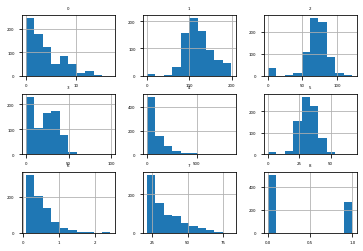

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset =  pd.read_csv('../dataset/pima-indians-diabetes.csv',header = None)

print(dataset.shape)

print(dataset.describe)

#histogram
fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('../dataset/pima-indians-diabetes.csv',header=None)

data = dataset.values

X , y = data[:,:-1], data[:,-1]

#Ensure inputs are floats and outputs are integer lables
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define model
model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(model,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print(" Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))


 Accuracy is 0.717 (0.040)


#### MinMaxScaler Transform 

(768, 9)
<bound method NDFrame.describe of             0         1         2         3         4         5         6         7
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415  0.483333
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567  0.166667
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629  0.183333
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002  0.000000
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638  0.200000
..        ...       ...       ...       ...       ...       ...       ...       ...
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710  0.700000
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870  0.100000
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307  0.150000
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713  0.433333
767  0.058824  0.467337  0.573770

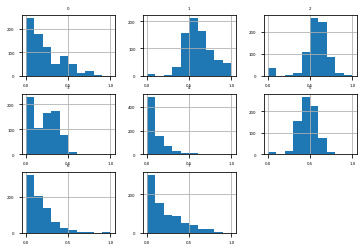

In [9]:
from sklearn.preprocessing import MinMaxScaler

dataset =  pd.read_csv('../dataset/pima-indians-diabetes.csv',header = None)

print(dataset.shape)



data = dataset.values[:,:-1]

trans = MinMaxScaler()

data = trans.fit_transform(data)

dataset = pd.DataFrame(data)

print(dataset.describe)

#histogram
fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [10]:
## Evaluating the Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('../dataset/pima-indians-diabetes.csv',header=None)

data = dataset.values

X , y = data[:,:-1], data[:,-1]

#Ensure inputs are floats and outputs are integer lables
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

#Transformation
trans = MinMaxScaler()

Xtrans  = trans.fit_transform(X)
# define model
model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(model,Xtrans,y,cv=cv,scoring="accuracy",n_jobs=-1)

print(" Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))


 Accuracy is 0.738 (0.054)


#### Standard Scaler

(768, 9)
<bound method NDFrame.describe of             0         1         2         3         4         5         6         7
0    0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492  1.425995
1   -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061 -0.190672
2    1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397 -0.105584
3   -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763 -1.041549
4   -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909 -0.020496
..        ...       ...       ...       ...       ...       ...       ...       ...
763  1.827813 -0.622642  0.356432  1.722735  0.870031  0.115169 -0.908682  2.532136
764 -0.547919  0.034598  0.046245  0.405445 -0.692891  0.610154 -0.398282 -0.531023
765  0.342981  0.003301  0.149641  0.154533  0.279594 -0.735190 -0.685193 -0.275760
766 -0.844885  0.159787 -0.470732 -1.288212 -0.692891 -0.240205 -0.371101  1.170732
767 -0.844885 -0.873019  0.046245

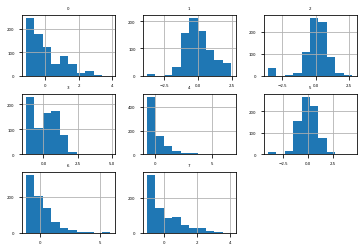

In [11]:
from sklearn.preprocessing import StandardScaler
dataset =  pd.read_csv('../dataset/pima-indians-diabetes.csv',header = None)

print(dataset.shape)



data = dataset.values[:,:-1]

trans = StandardScaler()

data = trans.fit_transform(data)

dataset = pd.DataFrame(data)

print(dataset.describe)

#histogram
fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [14]:
## Model Evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('../dataset/pima-indians-diabetes.csv',header=None)

data = dataset.values

X , y = data[:,:-1], data[:,-1]

#Ensure inputs are floats and outputs are integer lables
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

#Transformation
tran = StandardScaler()

Xtrans  = tran.fit_transform(X)
# define model
model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(model,Xtrans,y,cv=cv,scoring="accuracy",n_jobs=-1)

print(" Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))


 Accuracy is 0.739 (0.049)
